# Importing Libraries

In [1]:
import torch
import torchvision
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader, Dataset
from torchsummary import summary

import numpy as np, pandas as pd, matplotlib.pyplot as plt
import glob, cv2
from glob import glob
from random import shuffle
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
# Directories for our data
train_data_dir = "training_set"
test_data_dir = "testing_set"

## Resizing images

- Only resizing images for file size purposes on github

In [3]:
#ellie = glob(train_data_dir+"/ellie/*.jpg")
#salem = glob(train_data_dir+"/salem/*.jpg")

#ellie_names = ellie
#salem_names = salem

In [4]:
#for ix, img in enumerate(ellie):
    #img = (cv2.imread(ellie_names[ix])[:,:,::-1])
    #img = cv2.resize(img, None, fx=0.074, fy=0.074)
    #img = Image.fromarray(img)
    #img.save(ellie_names[ix])
    #print(img.size)

In [4]:
#for ix, img in enumerate(salem):
    #img = (cv2.imread(salem_names[ix])[:,:,::-1])
    #img = cv2.resize(img, None, fx=0.074, fy=0.074)
    #img = Image.fromarray(img)
    #img.save(salem_names[ix])
    #print(img.size)

(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)

(224, 298)
(224, 298)
(224, 298)
(224, 298)
(224, 298)


# Building our cats dataset class

In [20]:
class MyCats(Dataset):
    def __init__(self, folder):
        salem = glob(folder+"/salem/*.jpg")
        ellie = glob(folder+"/ellie/*.jpg")
        
        self.fpaths = salem + ellie
        shuffle(self.fpaths)
        
        # Assigning classes to our cats / salem = 1
        self.targets = [fpath.split('/')[-1].startswith("salem")
                           for fpath in self.fpaths]
        
    def __len__(self):
        return len(self.fpaths)
    
    def __getitem__(self, ix):
        path = self.fpaths[ix]
        target = self.targets[ix]
        img = (cv2.imread(path)[:,:,::-1])
        img = cv2.resize(img, (224, 224))
        
        return torch.tensor(img/255).permute(2, 0, 1).to(device).float(), \
                                    torch.tensor([target]).float().to(device)

## Inspecting a random image

In [21]:
data = MyCats(train_data_dir)
img, label = data[100]

In [22]:
img.shape

torch.Size([3, 224, 224])

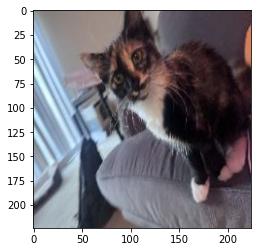

In [23]:
plt.imshow(img.permute(1, 2, 0).cpu())

# Creating our model